In [1]:
import feature_eng.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [11]:
X_train, y_train, X_test, y_test = utils.get_train_test_sets()

Loading data ...


/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cleaning data and feature engineering...
Spliting data into training and testing...
Done


In [28]:
len(X_train)

81733

In [25]:
X_train.loc[3160:3170]

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,propertyzoningdesc_20,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29
3160,3.0,6.0,0.0,3.0,0.0,2744.0,2744.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3162,3.5,4.0,0.0,3.5,2827.0,5222.0,5222.0,0.0,0.0,2827.0,...,0,0,0,0,0,0,0,0,1,0
3163,1.0,1.0,7.0,1.0,0.0,588.0,588.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3164,1.0,2.0,7.0,1.0,0.0,810.0,810.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3165,1.0,2.0,4.0,1.0,0.0,1015.0,1015.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3166,2.0,4.0,7.0,2.0,0.0,1397.0,1397.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3167,2.0,3.0,7.0,2.0,0.0,1634.0,1634.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3168,3.0,5.0,4.0,3.0,0.0,2464.0,2464.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3169,2.0,4.0,4.0,2.0,0.0,2257.0,2257.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3170,2.0,2.0,4.0,2.0,0.0,1216.0,1216.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_test.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,propertyzoningdesc_20,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29
3161,3.0,6.0,0.0,3.0,0.0,2744.0,2744.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3421,2.5,2.0,0.0,2.5,0.0,2031.0,2031.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4191,2.0,2.0,7.0,2.0,0.0,1257.0,1257.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10829,4.0,6.0,4.0,4.0,0.0,4021.0,4021.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
10941,3.0,3.0,1.0,3.0,0.0,2146.0,2146.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Change DataFrame to matrix 

In [33]:
X_train_m, X_test_m, y_train_m, y_test_m = list(map(lambda x: x.as_matrix(), (X_train, X_test, y_train, y_test)))

Random Forests example

In [40]:
rfclassifier = RandomForestRegressor(n_estimators=10)
rfclassifier.fit(X_train_m, y_train_m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
y_test_predict = rfclassifier.predict(X_test_m)

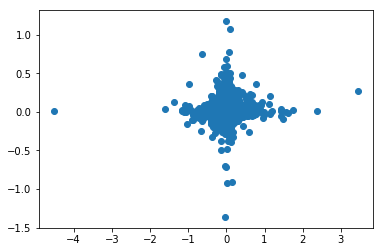

In [44]:
plt.scatter(y_test_m, y_test_predict)

In [46]:
np.mean(abs(y_test_m - y_test_predict))

0.081049716242727984

# Wrap up

In [47]:
import evaluator

In [52]:
ev = evaluator.Evaluator()
ev.load_train_test((X_train, y_train, X_test, y_test))

In [53]:
ev.fit(RandomForestRegressor(n_estimators=10))

Fitting from training data
Predicting
Training set 0.0335771701605
Testing set 0.0808090909712
